# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [27]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed =[]


record_counter = 0
set_counter = 0

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    weather_query_url = query_url + city
    # Get weather data
    response = requests.get(weather_query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
  
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass
    
    time.sleep(0.5)
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | albany
Processing record 2 of set 0 | puerto ayora
Processing record 3 of set 0 | khatanga
Processing record 4 of set 0 | ushuaia
Processing record 5 of set 0 | general roca
Processing record 6 of set 0 | san patricio
Processing record 7 of set 0 | ponta do sol
Processing record 8 of set 0 | longyearbyen
Processing record 9 of set 0 | rikitea
Processing record 10 of set 0 | hambantota
Processing record 11 of set 0 | chagda
City not found!
Processing record 12 of set 0 | kingaroy
Processing record 13 of set 0 | punta arenas
Processing record 14 of set 0 | port-gentil
Processing record 15 of set 0 | mount gambier
Processing record 16 of set 0 | hilo
Processing record 17 of set 0 | rabaul
Processing record 18 of set 0 | hermanus
Processing record 19 of set 0 | yakeshi
Processing record 20 of set 0 | nantucket
Processing record 21 of set 0 | richards bay
Processing record 22 of set 0 | attawapiskat
City not fo

Processing record 37 of set 3 | yenagoa
Processing record 38 of set 3 | lusambo
Processing record 39 of set 3 | fortuna
Processing record 40 of set 3 | araouane
Processing record 41 of set 3 | lavrentiya
Processing record 42 of set 3 | surt
Processing record 43 of set 3 | vrangel
Processing record 44 of set 3 | salalah
Processing record 45 of set 3 | peniche
Processing record 46 of set 3 | sadasivpet
Processing record 47 of set 3 | barentsburg
City not found!
Processing record 48 of set 3 | rio branco
Processing record 49 of set 3 | klaksvik
Processing record 50 of set 3 | aasiaat
Processing record 0 of set 4 | bay roberts
Processing record 1 of set 4 | riyadh
Processing record 2 of set 4 | seoul
Processing record 3 of set 4 | buqayq
City not found!
Processing record 4 of set 4 | thompson
Processing record 5 of set 4 | mayo
Processing record 6 of set 4 | tidore
City not found!
Processing record 7 of set 4 | tautira
Processing record 8 of set 4 | marcona
City not found!
Processing recor

Processing record 29 of set 7 | san angelo
Processing record 30 of set 7 | tombouctou
Processing record 31 of set 7 | tari
Processing record 32 of set 7 | enumclaw
Processing record 33 of set 7 | mahibadhoo
Processing record 34 of set 7 | carupano
Processing record 35 of set 7 | soyo
Processing record 36 of set 7 | paradwip
City not found!
Processing record 37 of set 7 | acapulco
Processing record 38 of set 7 | alekseyevsk
Processing record 39 of set 7 | badiraguato
Processing record 40 of set 7 | gambo
Processing record 41 of set 7 | soe
Processing record 42 of set 7 | powell river
Processing record 43 of set 7 | port hardy
Processing record 44 of set 7 | dhidhdhoo
Processing record 45 of set 7 | muravlenko
Processing record 46 of set 7 | baykit
Processing record 47 of set 7 | umzimvubu
City not found!
Processing record 48 of set 7 | zhangye
Processing record 49 of set 7 | oksfjord
Processing record 50 of set 7 | beruni
City not found!
Processing record 0 of set 8 | bambous virieux
Pr

Processing record 19 of set 11 | samalaeulu
City not found!
Processing record 20 of set 11 | santiago
Processing record 21 of set 11 | pedasi
Processing record 22 of set 11 | puerto baquerizo moreno
Processing record 23 of set 11 | prelouc
Processing record 24 of set 11 | guadalupe y calvo
Processing record 25 of set 11 | tilichiki
Processing record 26 of set 11 | strezhevoy
Processing record 27 of set 11 | lazaro cardenas
Processing record 28 of set 11 | saint-paul
Processing record 29 of set 11 | breclav
Processing record 30 of set 11 | ilebo
Processing record 31 of set 11 | boa vista
Processing record 32 of set 11 | bonavista
Processing record 33 of set 11 | sitka
Processing record 34 of set 11 | dzaoudzi
Processing record 35 of set 11 | kitob
Processing record 36 of set 11 | san cristobal
Processing record 37 of set 11 | kavieng
Processing record 38 of set 11 | sonamura
Processing record 39 of set 11 | panzhihua
Processing record 40 of set 11 | beringovskiy
Processing record 41 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
weather_df= pd.DataFrame({"City": new_cities,"Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp": max_temp, "Wind Speed":wind_speed})

weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75,US,1580066101,69,42.60,-73.97,42.01,6.93
1,puerto ayora,75,EC,1580066115,69,-0.74,-90.35,82.40,2.24
2,khatanga,95,RU,1580066116,98,71.97,102.50,-19.89,3.06
3,ushuaia,75,AR,1580066112,76,-54.80,-68.30,50.00,27.51
4,general roca,0,AR,1580066117,22,-39.03,-67.58,87.80,12.75


In [32]:
# Export the city weather data into a csv file
weather_df.to_csv('../output_data/cities.csv', index= False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

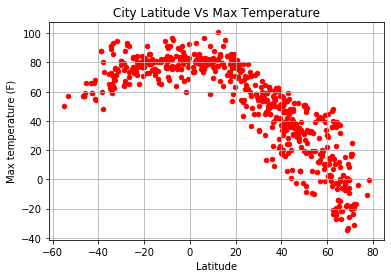

In [33]:
#Convert Date column to actual date with Datetime
weather_df["Date"] = pd.to_datetime(weather_df["Date"], unit="s")

# Latitude Vs Temperature Plot

weather_df.plot(kind='scatter', x='Lat', y='Max Temp', c='Red')
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()




#### Latitude vs. Humidity Plot

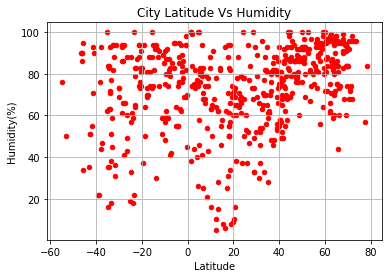

In [34]:
# Latitude Vs Humidity Plot

weather_df.plot(kind='scatter', x='Lat', y='Humidity', c='Red')
plt.title('City Latitude Vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()


#### Latitude vs. Cloudiness Plot

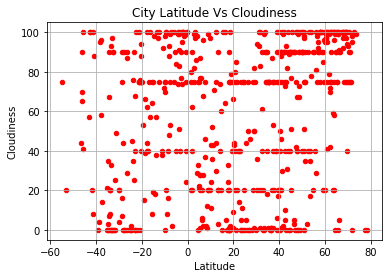

In [35]:
# Latitude Vs Cloudiness Plot

weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

#### Latitude vs. Wind Speed Plot

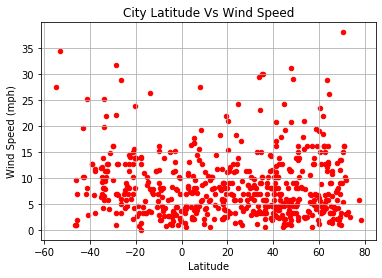

In [36]:
# Latitude Vs Windspeed Plot

weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', c='Red')
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots


In [42]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere DataFrame
north_hemi = weather_df[weather_df['Lat'] >= 0]
# Southern Hemisphere DataFrame
south_hemi = weather_df[weather_df['Lat'] < 0]

print(north_hemi.count())
print(south_hemi.count())

City          399
Cloudiness    399
Country       399
Date          399
Humidity      399
Lat           399
Lng           399
Max Temp      399
Wind Speed    399
dtype: int64
City          169
Cloudiness    169
Country       169
Date          169
Humidity      169
Lat           169
Lng           169
Max Temp      169
Wind Speed    169
dtype: int64


In [51]:
#See Northern DF

north_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75,US,2020-01-26 19:15:01,69,42.60,-73.97,42.01,6.93
2,khatanga,95,RU,2020-01-26 19:15:16,98,71.97,102.50,-19.89,3.06
5,san patricio,75,MX,2020-01-26 19:12:06,74,19.22,-104.70,86.00,6.93
6,ponta do sol,40,PT,2020-01-26 19:15:18,63,32.67,-17.10,64.40,8.05
7,longyearbyen,0,SJ,2020-01-26 19:15:07,84,78.22,15.64,-0.40,2.06


In [57]:
#See Southern DF

south_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,puerto ayora,75,EC,2020-01-26 19:15:15,69,-0.74,-90.35,82.40,2.24
3,ushuaia,75,AR,2020-01-26 19:15:12,76,-54.80,-68.30,50.00,27.51
4,general roca,0,AR,2020-01-26 19:15:17,22,-39.03,-67.58,87.80,12.75
8,rikitea,68,PF,2020-01-26 19:15:13,79,-23.12,-134.97,79.29,14.50
10,kingaroy,90,AU,2020-01-26 19:15:21,88,-26.53,151.83,69.80,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8837


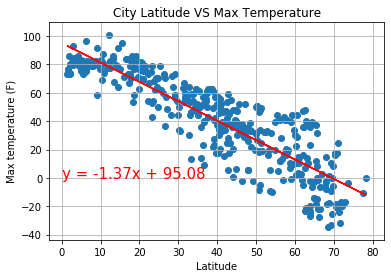

In [62]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Max Temp', c='Red')
plt.title('City Latitude Vs Max Temperteature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat = north_hemi.iloc[:, 5]
max_temp = north_hemi.iloc[:, 7]

#print(lat)

#print(max_temp)

correlation = st.pearsonr(lat, max_temp)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title("City Latitude VS Max Temperature")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5012


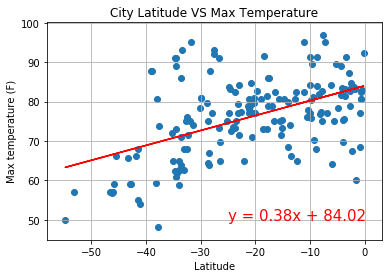

In [65]:
# sSatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Max Temp', c='Red')
plt.title('City Latitude Vs Max Temperteature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat2 = south_hemi.iloc[:, 5]
max_temp2 = south_hemi.iloc[:, 7]


correlation = st.pearsonr(lat2, max_temp2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title("City Latitude VS Max Temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.4268


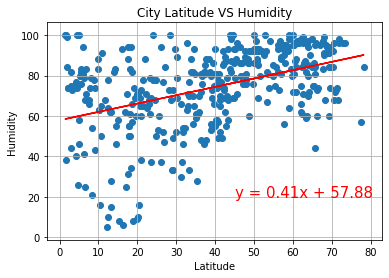

In [71]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Humidity', c='Red')
plt.title('City Latitude Vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat3 = north_hemi.iloc[:, 5]
humidity = north_hemi.iloc[:, 4]

correlation = st.pearsonr(lat3, humidity)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude VS Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.2154


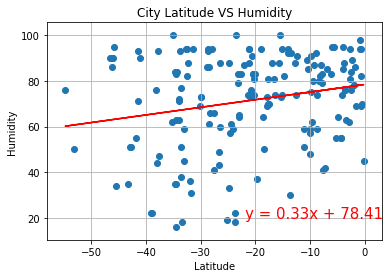

In [76]:
# Scatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Humidity', c='Red')
plt.title('City Latitude Vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat4 = south_hemi.iloc[:, 5]
humidity2 = south_hemi.iloc[:, 4]

correlation = st.pearsonr(lat4, humidity2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude VS Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.3629


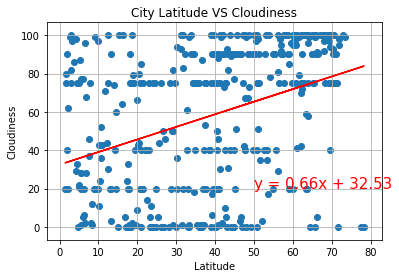

In [80]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Cloudiness', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat5 = north_hemi.iloc[:, 5]
cloudiness = north_hemi.iloc[:, 1]

correlation = st.pearsonr(lat5, cloudiness)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude VS Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.337


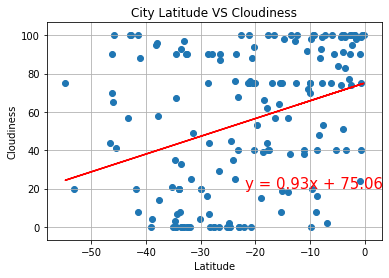

In [77]:
# Scatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Cloudiness', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat6 = south_hemi.iloc[:, 5]
cloudiness2 = south_hemi.iloc[:, 1]

correlation = st.pearsonr(lat6, cloudiness2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude VS Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.035


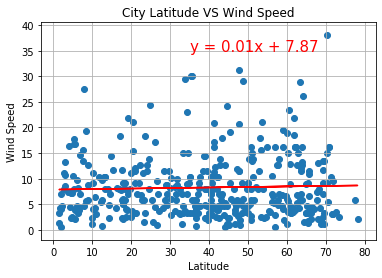

In [84]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Wind Speed', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Windspeed)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat7 = north_hemi.iloc[:, 5]
windspeed = north_hemi.iloc[:, 8]

correlation = st.pearsonr(lat7, windspeed)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude VS Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.3197


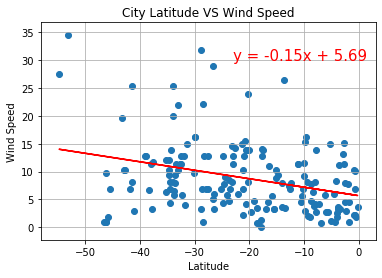

In [90]:
# Scatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Wind Speed', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Windspeed)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat8 = south_hemi.iloc[:, 5]
windspeed2 = south_hemi.iloc[:, 8]

correlation = st.pearsonr(lat8, windspeed2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude VS Wind Speed")
plt.show()